# **PROJECT 1: TITANIC SHIP WRECK SURVIVAL PREDICTION**

# Data Set Description:
Here in this project we are using machine learning algorithms to create a model that predicts which passengers survived the Titanic shipwreck.

# Feature-Columns:


*   survival ( 0 = No, 1 = Yes )
*  pclass - means Ticket class (1=1st,2=2nd,3=3rd)

*   sex (Male,Female)
*   sibsp - means weather Siblings / Spouse on board

*   parch - means weather Children / Parents on board
*   ticket - means ticket number

*   fare - means passengers ticket fare
*   cabin - means Cabin Number

*   embarked - means port of embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton)





















# **Import Libraries:**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv(r"D:\Machine_Learning_Projects\Titanic_Prediction_Project\titanic_train.csv")

# Displaying first five observations.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA - Exploratory Data Analysis**

**Shape:**

In [5]:
print("Shape of Data Frame:",df.shape)

Shape of Data Frame: (891, 12)


**Data Types of Features:**

In [6]:
print("Data Types of Feature columns:")
print(df.dtypes)

Data Types of Feature columns:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Describe the data sets statistical information:**

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Duplicate Values:**

In [8]:
print("Number of duplicate values:",df.duplicated().sum())

Number of duplicate values: 0


**Missing Values:**


*    177 missing values in 'Age'
*   687 missing values in 'Cabin'




In [9]:
print("Null values in Data Frame:\n")
print(df.isna().sum())

Null values in Data Frame:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Missing Value Visualization:**

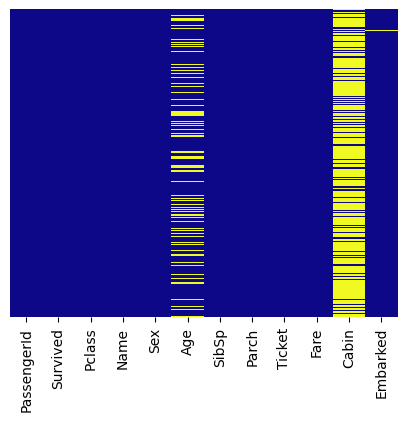

In [10]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),xticklabels=True,yticklabels=False,cbar = False,cmap='plasma')
plt.show()

**Insights from heatmap:**

*   There are missing values in 'Age' and 'Cabin' columns.
*   'Cabin' column is having high density of missing values.



**Count of Survived & Deceased - Visualization:**

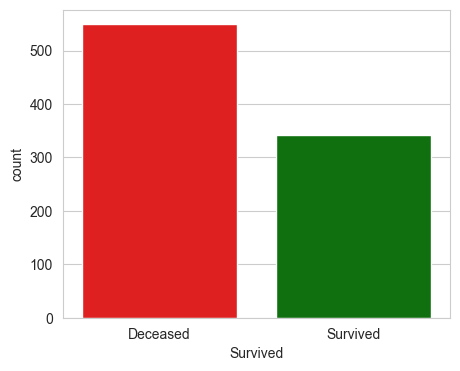

In [11]:
plt.figure(figsize=(5,4))
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',data = df,palette=['red','green'])
plt.xticks([0,1],['Deceased','Survived'])
plt.show()


**Insights from countplot:**

* Red bar displays count of deceased people and it is around 550 in numbers.
* Green bar displays count of people those who survived and it is around 350.



**Count of Survival - with Filter : Gender**

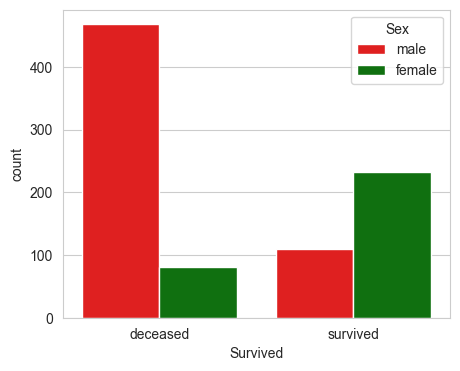

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived',data=df,palette=['red','green'],hue='Sex')
plt.xticks([0,1],['deceased','survived'])
plt.show()


**Insights from above graph (Count plot):**

*   Out of the deceased people majority are Males.
*   Out of the survived people majority are Females.



**Survival by Passenger class:**

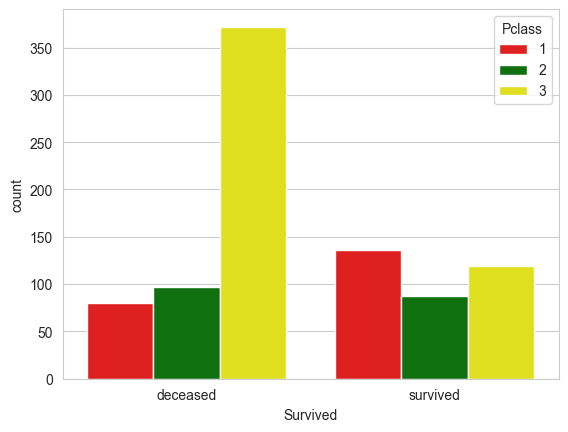

In [13]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived',data = df,palette=['red','green','yellow'],hue='Pclass')
plt.xticks([0,1],['deceased','survived'])
plt.show()


**Insight from count plot:**

* Out of the deceased category of people majority belongs to 3rd class passengers.
*   Out of the survived category of people majority are from 1st class passengers.



**Age Distribution:**

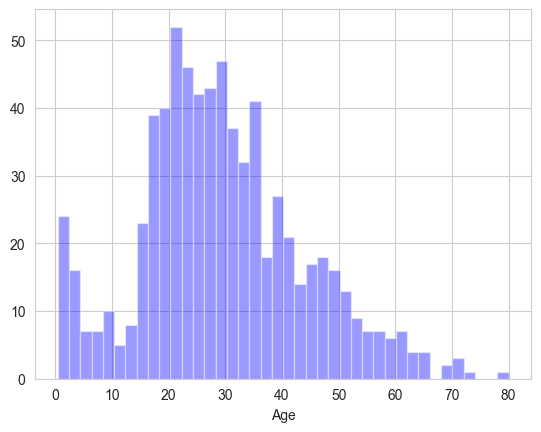

In [14]:
sns.distplot(df['Age'].dropna(),kde=False,color='blue',bins=40)
plt.show()

**Insight from distplot() of 'Age':**

*   Majority of the passengers belongs to age category between around 18 and 30.
*   Children and Elderly people are very less in numbers.



**Count of Siblings/Spouse:**

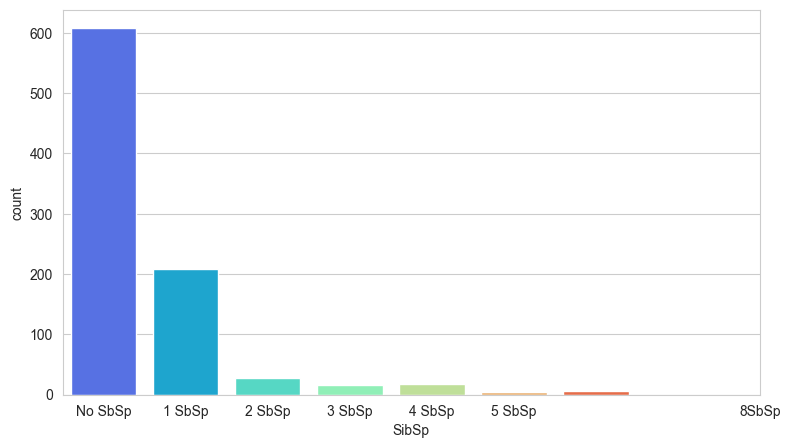

In [15]:
plt.figure(figsize=(9,5))
sns.countplot(x='SibSp',data=df,palette='rainbow')
plt.xticks([0,1,2,3,4,5,8],['No SbSp','1 SbSp','2 SbSp','3 SbSp','4 SbSp','5 SbSp','8SbSp'])
plt.show()

**Insight from countplot of Siblings/Spouse:**

*   Majority of passengers donot have either their siblings or spouse on board.
*   Around 205 passengerd had their Spouse/Sibling on board and that too only one number.



**Boarding Port - Visualization:**

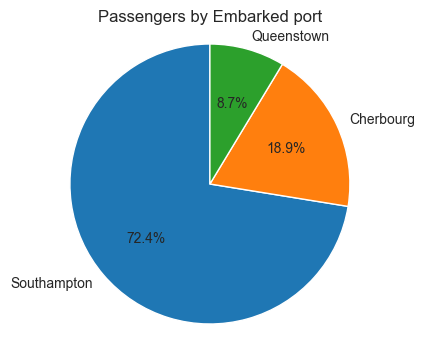

In [16]:
plt.figure(figsize=(5,4))
port_count = df['Embarked'].value_counts()
labels = ["Southampton", "Cherbourg", "Queenstown"]
plt.pie(port_count,labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Passengers by Embarked port')
plt.show()

**Insight from pie chart:**

*   Majority of passengers boarded ship at Southampton port.
*   Very few percentage of people boarded the ship at Queenstown port.




**Age by Passenger class:**

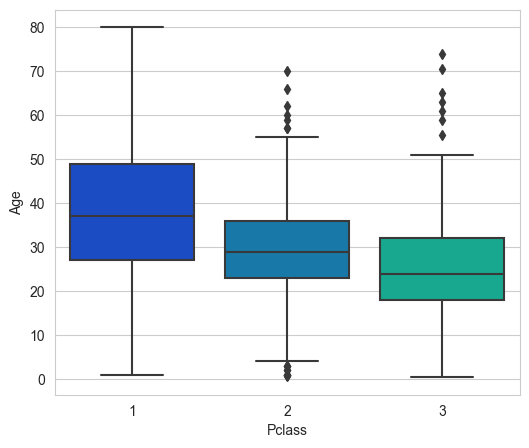

In [17]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x=df['Pclass'],y=df['Age'],palette='winter')
plt.show()

**Insight from Boxplot:**

Average age of passengers belonging to different passenger class.


*   1st class - Around 37 years old
*   2nd class - Around 28 years old

*   3rd class - Around 24 years old













# **Data Cleaning**

In [18]:
# Removing column 'Cabin' as it is having huge number of missing values
df.drop(columns='Cabin',axis= 1, inplace= True)

In [19]:
# Filling the missing values in age column:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [20]:
# Removing unwanted columns:
df.drop(columns=['PassengerId','Ticket','Name'],inplace=True)

In [21]:
# Verifying Null values:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Label Encoding: 'Sex' & 'Embarked'**

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])



In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


**Separating as Independent and dependent variables:**

In [24]:
X = df.drop(columns='Survived')
y = df['Survived']
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (891, 7)
Shape of y: (891,)


**Scaling down feature columns: Using MinMaxScaler**

In [25]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [1.        , 0.        , 0.36792055, ..., 0.33333333, 0.04577135,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.5       ]])

**Separating as Training Data  and Test Data:**

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=1)


In [27]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (623, 7)
Shape of y_train: (623,)
Shape of X_test: (268, 7)
Shape of y_test: (268,)


# **Machine Learning Model Building:**

As of now we have cleaned our data set , scaled it and we have separated the data set into training and testing data. Now moving on to build Machine Learning Model.


> **ML - Models:**

*   **KNeighborClassifier**
*   **Naive Bayes Classifier**

*   **Decision Tree Classifier**
*   **Support Vector Machine Classifier**

*   **RandomForest Classifier**













In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [29]:
knn_model = KNeighborsClassifier()
svc_model = SVC()
nb_model = GaussianNB()
dtree_model = DecisionTreeClassifier(criterion='entropy')
rf_model = RandomForestClassifier()


### Training ML - Models

In [30]:
models = [knn_model,svc_model,nb_model,dtree_model,rf_model]

for model in models:
    print("-"*25,type(model).__name__,"-"*25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:\n",classification_report(y_test,y_pred))

------------------------- KNeighborsClassifier -------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       153
           1       0.82      0.59      0.69       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.78      0.77      0.76       268

------------------------- SVC -------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       153
           1       0.86      0.54      0.66       115

    accuracy                           0.76       268
   macro avg       0.80      0.74      0.74       268
weighted avg       0.79      0.76      0.75       268

------------------------- GaussianNB -------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78    

In [31]:
accuracy = [0.77,0.76,0.76,0.76, 0.78]
ml_models = ['KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier']

accu_df = pd.DataFrame({'ML_Models':ml_models,'Accuracy':accuracy})

max_accu = accu_df['Accuracy'].max()

accu_df_styled = accu_df.style.apply(lambda x:['background: green' if v == max_accu else " " for v in x],subset=pd.IndexSlice[:,['Accuracy']])
accu_df_styled

,ML_Models,Accuracy
0,KNeighborsClassifier,0.770000
1,SVC,0.760000
2,GaussianNB,0.760000
3,DecisionTreeClassifier,0.760000
4,RandomForestClassifier,0.780000


#### Result: Out of 5 Machine Learning models used RandomForestClassifier algorithm gave highest accuracy 78%

In [32]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Note: The data set we are using is an imbalanced data set , so let us balance it using Random Over sampling technique.

### Performing Random Over Sampling:

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_over_sampled,y_over_sampled = sm.fit_resample(X,y)


In [34]:
y_over_sampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [35]:
# Scaling it down:
X_os_scaled = mms.fit_transform(X_over_sampled)

In [36]:
X_os_train,X_os_test,y_os_train,y_os_test = train_test_split(X_os_scaled,y_over_sampled,test_size=0.25,random_state=1)
print("X_train shape:",X_os_train.shape)
print("y_train shape:",y_os_train.shape)

X_train shape: (823, 7)
y_train shape: (823,)


### Predictions after Over Sampling:

In [37]:
knn_model2 = KNeighborsClassifier()
svc_model2 = SVC()
nb_model2 = GaussianNB()
dtree_model2 = DecisionTreeClassifier(criterion='entropy')
rf_model2 = RandomForestClassifier()

In [38]:
models = [knn_model2,svc_model2,nb_model2,dtree_model2,rf_model2]

for model in models:
    print("-"*25,type(model).__name__,"-"*25)
    model.fit(X_os_train,y_os_train)
    y_pred_new = model.predict(X_os_test)
    print("Classification Report:\n",classification_report(y_os_test,y_pred_new))

------------------------- KNeighborsClassifier -------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.80       128
           1       0.85      0.79      0.82       147

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275

------------------------- SVC -------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       128
           1       0.89      0.72      0.80       147

    accuracy                           0.80       275
   macro avg       0.81      0.81      0.80       275
weighted avg       0.82      0.80      0.80       275

------------------------- GaussianNB -------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.74    

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       128
           1       0.86      0.84      0.85       147

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



In [39]:
acc_label = [0.82,0.80,0.77,0.78,0.83]
ml = ['KNeighborsClassifier','SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier']

df_os = pd.DataFrame({'Ml_models':ml,'Accu_after':acc_label})

max_accu2 = df_os['Accu_after'].max()

df_os_styled = df_os.style.apply(lambda x:['background: green' if v == max_accu2 else " " for v in x],subset=pd.IndexSlice[:,['Accu_after']])
df_os_styled

,Ml_models,Accu_after
0,KNeighborsClassifier,0.820000
1,SVC,0.800000
2,GaussianNB,0.770000
3,DecisionTreeClassifier,0.780000
4,RandomForestClassifier,0.830000


#### Comparing Accuracy Before and After Over sampling:



In [40]:
data = pd.concat([accu_df,df_os['Accu_after']],axis=1)

max1 = data['Accuracy'].max()
max2 = data['Accu_after'].max()

def highlight_max(column):
    """
    Apply green background to the highest value in the column.
    """
    is_max = column == column.max()
    return ['background:green' if v else '' for v in is_max]

df_compared =data.style.apply(highlight_max,subset=[data.columns[1],data.columns[2]])

df_compared

,ML_Models,Accuracy,Accu_after
0,KNeighborsClassifier,0.770000,0.820000
1,SVC,0.760000,0.800000
2,GaussianNB,0.760000,0.770000
3,DecisionTreeClassifier,0.760000,0.780000
4,RandomForestClassifier,0.780000,0.830000


### Performing Hyper-Parameter Tuning to improve the performance of the model:

In [41]:
# we will be using RandomSearch CV to find the best parameters for the model:
# Out of 5 models RandomForest Classifier gave higher accuracy so we will be working on this 
# model to perform Hyperparameter tuning to improve the performance.
'''from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

rf_model3 = RandomForestClassifier()

param_distribution ={ 'max_depth':[3,5,10,None],
                     'n_estimators':[100,200,300,400,500],
                     'max_features':randint(1,3),
                     'criterion':['gini','entropy'],
                     'bootstrap':[True,False],
                     'min_samples_leaf':randint(1,4)}

random_cv = RandomizedSearchCV(estimator=rf_model3,param_distributions= param_distribution,n_jobs=-1,cv=9)

random_cv.fit(X_os_train,y_os_train)
best_params = random_cv.best_params_
best_score = random_cv.best_score_

print(best_params)
print(best_score*100)'''

"from scipy.stats import randint\nfrom sklearn.model_selection import RandomizedSearchCV\n\nrf_model3 = RandomForestClassifier()\n\nparam_distribution ={ 'max_depth':[3,5,10,None],\n                     'n_estimators':[100,200,300,400,500],\n                     'max_features':randint(1,3),\n                     'criterion':['gini','entropy'],\n                     'bootstrap':[True,False],\n                     'min_samples_leaf':randint(1,4)}\n\nrandom_cv = RandomizedSearchCV(estimator=rf_model3,param_distributions= param_distribution,n_jobs=-1,cv=9)\n\nrandom_cv.fit(X_os_train,y_os_train)\nbest_params = random_cv.best_params_\nbest_score = random_cv.best_score_\n\nprint(best_params)\nprint(best_score*100)"

#### Best parameters after Hyper parameter Tuning:

##### n_estimators = 400
##### min_samples_leaf = 2
##### max_features = 1
##### max_depth = None
##### criterion = gini
##### bootstrap = False

In [42]:
rf_model4 = RandomForestClassifier(n_estimators=400,min_samples_leaf=2,max_features=1,max_depth=None,criterion='gini',bootstrap=False)

rf_model4.fit(X_os_train,y_os_train)

y_pred_ht = rf_model4.predict(X_os_test)

print("Accuracy Score:\n",classification_report(y_os_test,y_pred_ht))

Accuracy Score:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       128
           1       0.83      0.84      0.83       147

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



#### Result after Hyper parameter Tuning: The overall accuracy of our random forest classifier improved to 84%


In [43]:
print(type(y_pred_ht))

<class 'numpy.ndarray'>


In [44]:
prediction = pd.DataFrame(y_pred_ht,columns=['Survival'])
prediction['Survival'].value_counts()

1    148
0    127
Name: Survival, dtype: int64

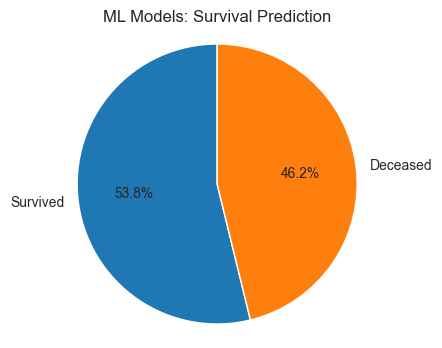

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
labels=['Survived','Deceased']
plt.pie(prediction['Survival'].value_counts(),labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('ML Models: Survival Prediction')
plt.show()

#### Thus from this Machine Learning Project we were able to predict the survival of passengers those who boarded Titanic ship.
#### From the test data set out of 275 passengers only 50.2% passengers survived remaining ie 49.8% passengers perished.

In [46]:
# creating the Pickle file for making the web application:
import joblib

# Save the trained model as a file
joblib.dump(rf_model4,'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']